In [1]:
text1 = '''Почему он используется?
Давно выяснено, что при оценке дизайна и композиции читаемый текст
мешает сосредоточиться. Lorem Ipsum используют потому, что тот
обеспечивает более или менее стандартное заполнение шаблона,
а также реальное распределение букв и пробелов в абзацах, которое
не получается при простой дубликации "Здесь ваш текст.. Здесь ваш текст..
Здесь ваш текст.." Многие программы электронной вёрстки и редакторы
HTML используют Lorem Ipsum в качестве текста по умолчанию, так
что поиск по ключевым словам "lorem ipsum" сразу показывает, как много
веб-страниц всё ещё дожидаются своего настоящего рождения. За прошедшие годы
текст Lorem Ipsum получил много версий. Некоторые версии появились по ошибке,
некоторые - намеренно (например, юмористические варианты).'''

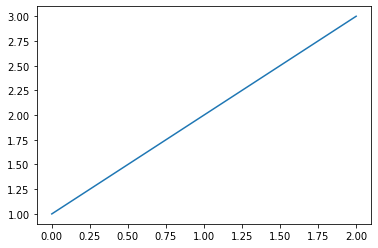

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3])

earli break


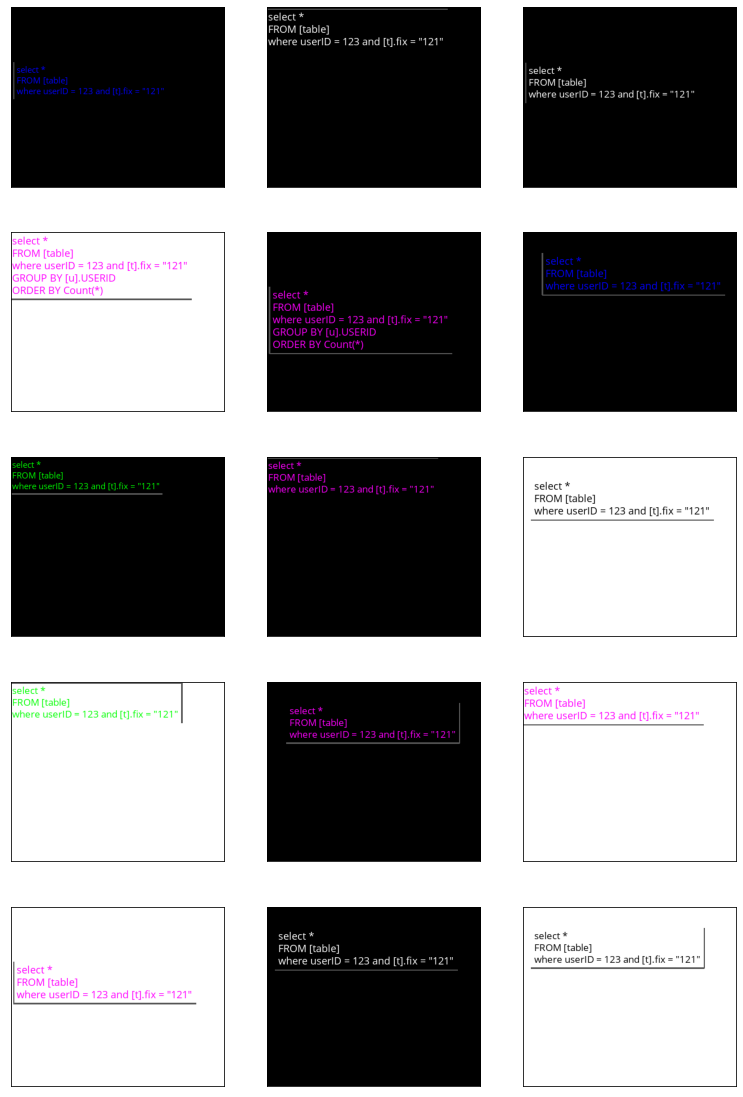

In [5]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import MyGenerator.utils.transforms as T
from util.augmentation import BaseTransform
from dataset.MyDataset import MyDataset
from train_config import configuration
def get_transform(train):
    transforms = []
    transforms.append(T.PILToTensor())
    transforms.append(T.ConvertImageDtype(torch.float))
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)    

train_tfms = get_transform(False)
def get_vis_image(image, gt_points, is_show_points = False):
    a = image[0].permute(1,2,0).to(torch.int32).numpy()
    if is_show_points:
        gt_point_list = gt_points[0]
        for gt_point in gt_point_list:
            for x,y in gt_point:
                x,y = int(x),int(y)
                a = cv2.circle(a, (x,y), radius=1, color=(0, 0, 255), thickness=1)
        img_array = cv2.UMat.get(a)
    else:
        img_array = a
        # proposal_point_list = proposal_points[0]
# for gt_point in proposal_point_list:
#     for x,y in gt_point:
#         x,y = int(x),int(y)
#         a = cv2.circle(a, (x,y), radius=1, color=(0, 255, 0), thickness=1)

    
    return img_array
means = (0.485, 0.456, 0.406)
stds = (0.229, 0.224, 0.225)
transform=BaseTransform(size=[1280, 1024], mean=means, std=stds)

confs = [{
        'fonts':['dataset/MyGenerator/font.ttf']
        , 'texts':['select *\nFROM [table]\nwhere userID = 123 and [t].fix = "121"'
                ,'select *\nFROM [table]\nwhere userID = 123 and [t].fix = "121"\nGROUP BY [u].USERID\nORDER BY Count(*)'
                ]
                    
        , 'text_colors':['#0000ff','#00ff00','#ff0000','#ff00ff','#000000','#ffffff'] #,'#ff0000'
        , 'size_images':[(380,320)]
        , 'position_texts':[(2,4),(20,40),(40,40),(10,100)] #,
        , 'font_sizes':[15,17,18]
        , 'background_colors':['#ffffff','#000000']
        
        # , 'use_sintaxis_color':[True,False]
        # , 'use_noze':[0, 20, 40] #value in percent
        , 'use_lines':['0000','2000','0200','0020','0002','2300','0230','0023','0032']
        , 'use_box':[False]
        , 'box_colors':['#555555']
        # , 'use_special_chars':[True, False]
    }]

dataset = MyDataset([confs[0]],is_training=True,transform=None)
loader = DataLoader(dataset, batch_size=1, shuffle=True)

#np.ceil()
rows = 5
cols = 3
_,ax = plt.subplots(rows,cols,figsize=(13,20))
y,x = 0,-1
it = 0
for batch in loader:
    image, train_mask, tr_mask, distance_field, \
            direction_field, weight_matrix, \
            gt_points, proposal_points, ignore_tags = batch
    img_array = get_vis_image(image, gt_points, is_show_points = False)
    if x + 1 < cols:
        x += 1
    elif y + 1 < rows:
        x = 0
        y += 1
    else:
        print('earli break')
        break
    if rows == 1 and cols == 1:
        ax_f = ax
    elif rows == 1:
        ax_f = ax[x]
    elif cols == 1:
        ax_f = ax[y]
    else:
        ax_f = ax[y][x]
    
    ax_f.imshow(img_array)
    ax_f.set_xticks([])
    ax_f.set_yticks([])
    it += 1
plt.show()

12


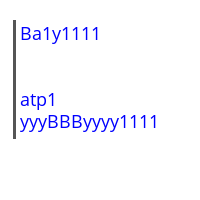

In [17]:
from MyGenerator.ImageGenerator import Params,ImageGenerator

#Params
conf = {
    'fonts':['dataset/MyGenerator/font.ttf']
    , 'texts':['Ba1y1111\n\n\natp1\nyyyBBByyyy1111']
    , 'text_colors':['#0000ff','#ffffff'] #,'#ff0000'
    , 'size_images':[(200,200)]
    , 'position_texts':[(20,20)] #,
    , 'font_sizes':[17,18]
    , 'background_colors':['#ffffff','#000000']
    , 'use_box':[False]
    , 'box_colors':['#555555']
    
    # , 'use_sintaxis_color':[True,False]
    # , 'use_noze':[0, 20, 40] #value in percent
    #, 'use_lines':['','|','-','\\','/']
    , 'use_lines':['0003']
    , 'lines_colors':['#555555','#2222ff']
    , 'box_colors':['#555555']
    # , 'use_special_chars':[True, False]
}
p = Params(conf)

# Params.get_params()
i = ImageGenerator([conf])
print(i.size)
img, boxs, texts = i.get_by_index(4)
img

In [1]:
from MyGenerator.ImageGenerator import ImageGenerator
from dataset import MyDataset
from train_config import configuration
dataset = MyDataset(configuration,is_training=True,transform=None)

print(f'{len(dataset)=}')



/home/aleksei/.virtualenvs/ml/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


len(dataset)=4550


In [11]:
import os
import json
from MyGenerator.ImageGenerator import Params
i = ImageGenerator(configuration)


image_path = 'data/MyDataset/Images/'
annotation_path = 'data/MyDataset/Annotations/'

def file_name_from_path(path:str):
    #print(f'{path=}')
    file = path.split('/')[-1]
    res = os.path.splitext(file)[0]
    #print(f'{res=}')
    return res

for idx,params in enumerate(i.all_data_list):
    img, boxs, texts = i.generate_horizontal_text(params)
    
    font = file_name_from_path(params.fonts)
    
    file_name = f'im_{font}_{params.size_images[0]}x{params.size_images[1]}_{len(params.texts)}_{idx}'
    
    full_image_path = os.path.join(image_path,file_name + '.jpg')
    
    img.save(full_image_path)
    
    full_ant_path = os.path.join(annotation_path,file_name + '.json')
    
    with open(full_ant_path,'w') as f:
        f.write(json.dumps(params.__dict__))    
    #break


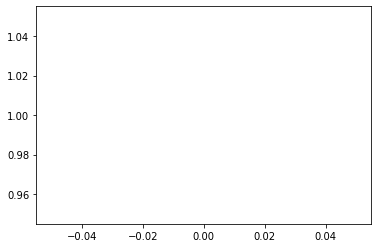

In [1]:
import matplotlib.pyplot as plt
plt.plot([1])

6


/home/aleksei/.virtualenvs/ml/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


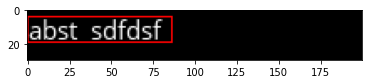

In [2]:

from MyGenerator.ImageGenerator import Params,ImageGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Params
conf = {
    'fonts':['dataset/MyGenerator/font.ttf']
    , 'texts':['abst  sdfdsf ']
    , 'text_colors':['#0000ff','#ffffff'] #,'#ff0000'
    , 'size_images':[(200,30)]
    , 'position_texts':[(1,1)] #,
    , 'font_sizes':[15]
    , 'background_colors':['#ffffff','#000000']
    , 'use_box':[False]
    , 'box_colors':['#555555']
    #, 'use_lines':['','|','-','\\','/']
    , 'use_lines':['0000']
    , 'lines_colors':['#555555','#2222ff']
    , 'box_colors':['#555555']
    # , 'use_special_chars':[True, False]
}
p = Params(conf)

# Params.get_params()
i = ImageGenerator([conf])
print(i.size)
img, boxs, texts = i.get_by_index(4)

p1,p2 = boxs[0].get_p1_p2()
img = cv2.rectangle(np.asarray(img),p1,p2,(255,0,0))

part = np.asarray(img)[boxs[0].y_min:boxs[0].y_max,boxs[0].x_min:boxs[0].x_max]

#plt.imsave('/home/aleksei/MyProject/netology/dll-19/diplom/parseq/demo_images/my_part_2.jpg',part)

plt.imshow(img)
#img

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#img [boxs[0].y_min:boxs[0].y_max,boxs[0].x_min:boxs[0].x_max]

#plt.show()
    

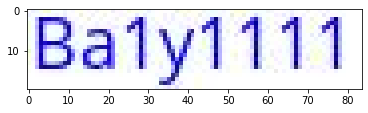

In [6]:
import numpy as np
import matplotlib.pyplot as plt

p = plt.imread('/home/aleksei/MyProject/netology/dll-19/diplom/parseq/demo_images/my_part.jpg')
plt.imshow(p)
